# 1. LeNet : 최초의 CNN
```
<img src='./image/LeNet.png' alt='LeNet'>
```
![LeNet](image/Lenet.png)
FC(120) : 120개 출력층의 뉴런을 가진 fully Connected 레이어

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, Flatten, Dense
                                                # AveragePooling2D 동일
from tensorflow.keras.callbacks import EarlyStopping, Callback
import pandas as pd # crosstab
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
class CustomHistory(Callback):  # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self, times=5):  # 생성자 함수
        self.epoch = 0
        self.times = times
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%self.times == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))
customHistory = CustomHistory(2)

In [9]:
# 출력사이즈 = (입력사이즈 - 커널사이즈)/스트라이드 +1
class LeNet:
    @staticmethod
    def build(input_shape=(32,32,1), activation='relu'): # 입력사이즈
        model = Sequential()
        model.add(Input(shape=input_shape))
        model.add(Conv2D(6, #커널 갯수
                        kernel_size=(5,5), # 커널사이즈
                        activation=activation,
                        kernel_initializer='he_normal',
                        padding='valid',
#                         strides=1 # 하나씩 전진하면서 캡처를 해줌 기본값1,1
                        )) # C1층
        model.add(AvgPool2D(pool_size=(2,2),
                            strides=2, # 스트라이드 사이즈는 기본이 pool_size 튜플로 안넣어도 사용가능
#                            strides=(2,2) 스트라이드 사이즈는 기본이 pool_size 튜플로 안넣어도 사용가능
                           )) # P2층
        model.add(Conv2D(16, # 커널 갯수
                         kernel_size=(5,5),
                         activation=activation,
                         kernel_initializer='he_normal')) # C3층
        model.add(AvgPool2D(pool_size=(2,2),
                           strides=2)) # P4층
        model.add(Flatten())
        model.add(Dense(120, activation='relu',
                       kernel_initializer='he_normal')) # F5층
        model.add(Dense(84, activation='relu',
                       kernel_initializer='he_normal')) # F6층
        model.add(Dense(10, activation='softmax')) # 출력층
        return model

In [15]:
class LeNet:
    @staticmethod
    def build(input_shape = (32, 32, 1), activation = 'relu'):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(6, 
                   kernel_size = (5, 5),
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2),
            Conv2D(16, 
                   kernel_size = (5, 5),
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2),
            Flatten(),
            Dense(120, activation = 'relu',
                  kernel_initializer = 'he_normal'),
            Dense(84, activation = 'relu',
                  kernel_initializer = 'he_normal'),
            Dense(10, activation = 'softmax') # 출력층
        ])
        return model

In [16]:
model = LeNet.build(input_shape=(28,28,1), activation='relu')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [18]:
# 1. 데이터 준비
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [21]:
# 2. 모델생성
model = LeNet.build(input_shape=(28, 28, 1))  # activation='relu' 생략 가능
# 3. 학습설정
model.compile(loss='sparse_categorical_crossentropy',  # 원핫인코딩을 하지 않고 분류분석 시
              optimizer='adam', metrics=['accuracy'])
# 4. 학습시키기
customHistory = CustomHistory(3)
earlystopping = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[customHistory, earlystopping], verbose=0)

epoch:3, loss:0.050421092659235, acc:0.9844375252723694, val_loss:0.05106062442064285, val_acc:0.9860000014305115
epoch:6, loss:0.025838050991296768, acc:0.9917083382606506, val_loss:0.04930581524968147, val_acc:0.9852499961853027
epoch:9, loss:0.017850585281848907, acc:0.9941458106040955, val_loss:0.04188576340675354, val_acc:0.9894999861717224
epoch:12, loss:0.011859727092087269, acc:0.9959791898727417, val_loss:0.040078699588775635, val_acc:0.9895833134651184
epoch:15, loss:0.010158305056393147, acc:0.9962916374206543, val_loss:0.047224462032318115, val_acc:0.9894166588783264
epoch:18, loss:0.008303789421916008, acc:0.9973124861717224, val_loss:0.051117684692144394, val_acc:0.9893333315849304


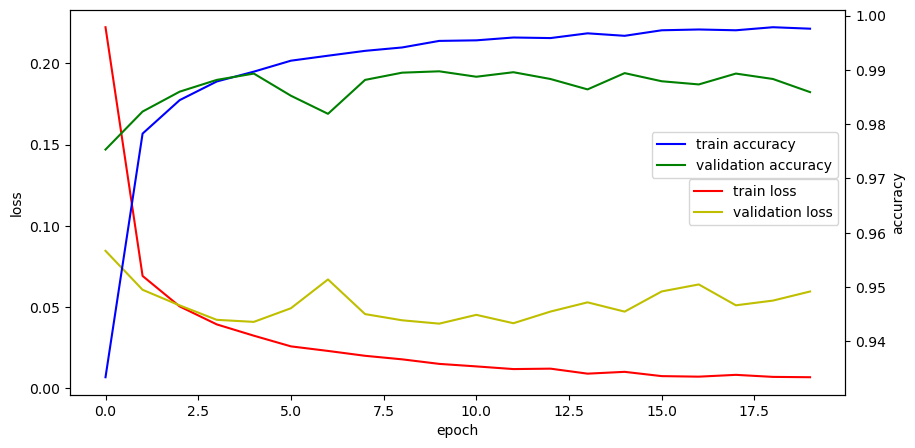

In [24]:
# 5. 모델 평가하기
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print('accuracy : {:.2f}%', accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9879
accuracy : {:.2f}% 98.79000186920166


In [30]:
# 예측치와 실제값을 이용한 교차표
yhat = model.predict(X_test).argmax(axis=1)
display(pd.crosstab(y_test, yhat)) # 결과가 데이터프레임
# print(confusion_matrix(y_test, yhat)) # 결과가 넘파이배열
cnt = 0
for y, h in zip (y_test, yhat):
    if y!=h:
        cnt +=1
print('얘측이 틀린 갯수 :', cnt)

313/313 [==============================] - 1s 2ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,977,2,0,0,0,0,1,0,0,0
1,0,1132,1,0,0,0,0,1,1,0
2,2,16,994,4,0,1,0,12,3,0
3,0,2,0,993,0,10,0,1,1,3
4,0,0,0,0,975,0,0,2,1,4
5,1,0,0,0,0,890,1,0,0,0
6,2,3,0,0,1,4,947,0,1,0
7,1,2,1,0,0,0,0,1021,0,3
8,2,0,1,2,0,2,1,1,962,3


얘측이 틀린 갯수 : 121


i =  2941
cnt =  50


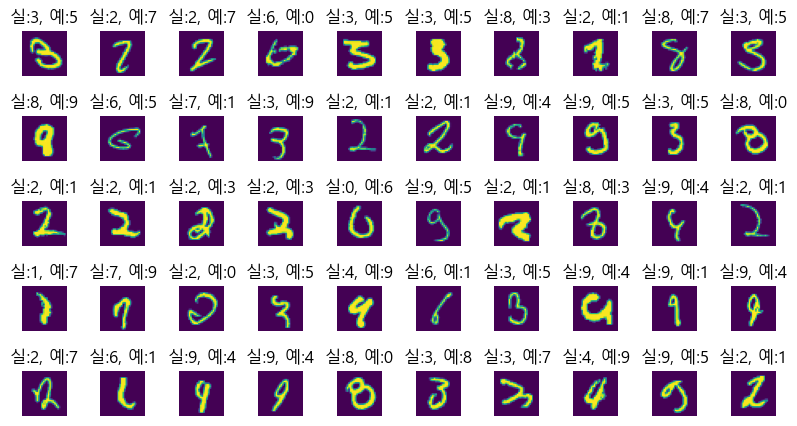

In [35]:
# 모델 학습 후 틀린 경우만 출력
plt_row = 5  # 10행 세로 
plt_col = 10  # 10열 가로
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)  # 상하여백, 좌우여백

i = 0    # y_hat과 y_test를 액세스할 index
cnt = 0  # 출력할 횟수
while (cnt < plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i] == y_test[i]:  # 실제값 == 예측치일 경우
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt // plt_col, cnt % plt_col]
    sub_plot.imshow(X_test[i].reshape(28, 28))  # 예측이 틀린 그림
    title = '실:{}, 예:{}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)

# 2. AlexNet
![AlexNet](image/AlexNet.png)
- GPU를 사용하여 실현 가능한 모델. 알렉스와 제프리힌튼이 공동 설계한 CNN 아키텍처 이름

In [1]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # 배치정규화
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [4]:
# 출력사이즈 = (입력사이즈-커널사이즈)/스트라이드 + 1
class AlexNet:
    @staticmethod
    def build(input_shape=(224,224,3), activation='relu', class_num=1000):
        model = Sequential([
            Input(shape=input_shape),
        Conv2D(96, # 커널 갯수
              kernel_size=(11,11),
              strides=(4,4),
              activation=activation,
              padding='same'),
        MaxPooling2D(pool_size=(3,3),
                    strides=(2,2)),
        BatchNormalization(), # 배치 정규화
        
        Conv2D(256,
              kernel_size=(5,5),
              activation=activation,
              padding = 'same'),
#         MaxPooling2D(pool_size=(3,3),
#                     strides=2),
        BatchNormalization(), # 배치 정규화
            
        Conv2D(384,
              kernel_size=(3,3),
              activation=activation,
              padding='same'),
        Conv2D(384,
              kernel_size=(3,3),
              activation=activation,
              padding='same'),
        Conv2D(384,
              kernel_size=(3,3),
              activation=activation,
              padding='same'),
#         AlexNex은 224*224 이미지에 맞춰서 3*3 pooling이 되나,
#         cifar 32*32 이미지에서는 생략
        MaxPooling2D(pool_size=(3,3),
                    strides=2),
        Flatten(), # 1차원으로 변경
        Dense(units=4096,
             activation=activation),
        Dropout(.5),
        Dense(units=4096,
             activation=activation),
        Dropout(.5),
        Dense(units=class_num,
             activation='softmax')
        ])
        return model

In [5]:
model = AlexNet.build(input_shape=(32,32,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 3, 3, 256)        1024      
 hNormalization)                                                 
                                                        

In [6]:
# 1. 데이터 (원핫인코딩 X)
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

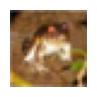

array([6], dtype=uint8)

In [7]:
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
plt.figure(figsize=(1,1))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()
y_train[0]

In [8]:
# 스케일 조정
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape, y_test.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (10000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
# 2. 모델 생성
# model = AlexNet.build(input_shape=(32, 32, 3), class_num=10)  # 학습시간 단축을 위해 아래 모델을 사용함
model = Sequential([
            Input(shape=(32, 32, 3)),
            Conv2D(96,  # 커널갯수
                   kernel_size=(11, 11),
                   strides=(4, 4),
                   activation='relu',
                   padding='same'),  # 11*11*96*3(채널수)+96(출력수) = 34944
            MaxPooling2D(pool_size=(3, 3), strides=2),
            BatchNormalization(),  # 배치정규화
            
            Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),  # 96*3*3*384+384 = 332160
            Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),  # 384*3*3*256+256 = 884992

            Flatten(),            
            Dense(units=1024, activation='relu'),  # 2360320
            Dropout(0.4),
            Dense(units=512, activation='relu'),   # 1024*512+512 = 524800
            Dropout(0.3),
            Dense(units=10, activation='softmax')  # 출력층
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 3, 3, 96)         384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 384)         332160    
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 256)         884992    
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [10]:
# 3. 학습설정
model.compile(loss='sparse_categorical_crossentropy', # 원핫인코딩 안했을때 사용
             optimizer='adam',
             metrics=['accuracy'])
hist = model.fit(X_train, y_train,
                epochs=20,
                validation_data=[X_test, y_test])

Epoch 1/20
1563/1563 [==============================] - 30s 17ms/step - loss: 1.6369 - accuracy: 0.4069 - val_loss: 1.5391 - val_accuracy: 0.4439
Epoch 2/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3687 - accuracy: 0.5154 - val_loss: 1.3987 - val_accuracy: 0.5100
Epoch 3/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2303 - accuracy: 0.5703 - val_loss: 1.3003 - val_accuracy: 0.5429
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1335 - accuracy: 0.6079 - val_loss: 1.2584 - val_accuracy: 0.5679
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0463 - accuracy: 0.6364 - val_loss: 1.2457 - val_accuracy: 0.5709
Epoch 6/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9692 - accuracy: 0.6652 - val_loss: 1.1993 - val_accuracy: 0.5930
Epoch 7/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8976 - accuracy: 0.6893 - val_loss: 1.1848 -

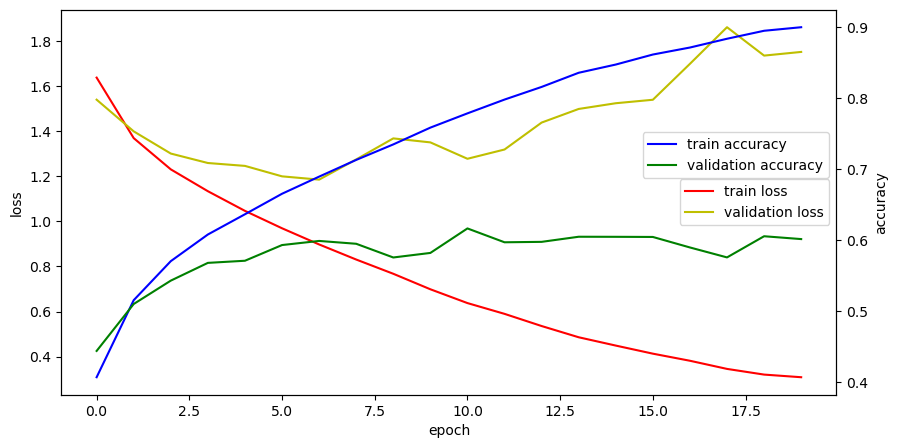

In [11]:
# 5. 모델 평가 - 학습과정 살펴보기, 모델 평가, 교차표
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [12]:
# 5. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('loss :', loss)
print('accuracy :', accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 1.7507 - accuracy: 0.6014
loss : 1.7507400512695312
accuracy : 0.6014000177383423


In [16]:
# 5. 모델 평가 : 교차표 
# airplane(0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)
# y_test.reshape(-1) # 실제값을 1차원으로 변경
y_hat = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(y_test.reshape(-1), y_hat)
ctab.columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ctab.columns.name = 'predict'
ctab.index = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ctab.index.name = 'real'
ctab

313/313 [==============================] - 2s 5ms/step


predict,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
real,,,,,,,,,,
airplane,650,24,57,44,44,21,13,35,77,35
automobile,24,677,13,20,7,14,11,15,51,168
bird,55,11,447,85,152,109,77,40,6,18
cat,9,16,58,415,96,229,88,50,11,28
deer,21,3,65,71,632,57,45,77,15,14
dog,7,7,38,194,98,526,41,64,7,18
frog,2,7,53,57,92,59,684,18,8,20
horse,15,10,28,69,92,101,13,645,4,23
ship,91,53,22,43,27,22,6,10,683,43


array([8], dtype=uint8)

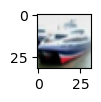

In [19]:
# 6. 모델 사용하기
plt.figure(figsize=(0.7,0.7))
plt.imshow(X_test[1])
y_test[1]

In [1]:
pred = model.predict(X_test[0].reshape(-1, 32,32,3)).argmax(axis=1)
pred

NameError: name 'model' is not defined

# 3. VGGNet
- 옥스퍼드 대 VGG팀에서 구현한 CNN(컴볼루션과 맥스폴링 19개층)
-  VGG-19 구현

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.applications.vgg19 import VGG19
import cv2 # pip install opencv-python : 이미지 사이즈 조정
import matplotlib.pyplot as plt

In [2]:
class Vgg19:
    @staticmethod
    def build(input_shape = (224, 224, 3), activation = 'relu', class_num = 1000):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(64, (3, 3), activation = activation, padding = 'same'),
            Conv2D(64, (3, 3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(128, (3, 3), activation = activation, padding = 'same'),
            Conv2D(128, (3, 3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            Conv2D(256, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            Conv2D(512, (3,3), activation = activation, padding = 'same'),
            MaxPooling2D(),
            Flatten(),
            Dense(4096, activation = 'relu'),
            Dense(4096, activation = 'relu'),
            Dense(1000, activation = 'softmax')
        ])
        return model

In [3]:
model = Vgg19.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [4]:
vggModel = VGG19() # 학습을 하지 않고 imageNet으로 학습이 끝난 model&weights 
weights = vggModel.get_weights()
model.set_weights(weights=weights) # 학습이 끝난 가중치를 model에 이식
# 추가적인 재학습도 가능함

In [9]:
# model.predict(읽어온이미지를 224*224*3 넘파이배열로)
# 예측하기 위해 이미지를 읽어 -> 사이즈 조정 (openCV라이브러리 사용 : pip install opencv-python)
# 방법 1
img_cv2 = cv2.imread('data/sample.jpg', 
                    cv2.IMREAD_COLOR,  # BGR포맷, 알파(투명도)채널 무시
#                     cv2.IMREAD_UNCHANGED, # 투명도까지 그대로 읽어옴
#                      cv2.IMREAD_GRAYSCALE # 흑백으로 읽음
                    )
img_cv2= cv2.resize(img_cv2, dsize=(224,224),
                   interpolation=cv2.INTER_NEAREST) # INTER_NEAREST 보간법을 이용하여 사이즈조정

cv2.imshow('samplt', img_cv2)
cv2.waitKey(0) # 키보드입력을 기다림. 이미지가 화면에 표시된 상태를 유지
cv2.destroyAllWindows() # openCV를 통해 생성된 모든 창을 닫음
img_cv2.shape

(577, 700, 3)

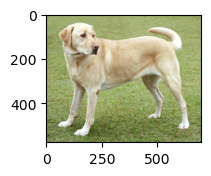

numpy.ndarray

In [15]:
plt.figure(figsize=(2,2))
# BGR 포맷인 img_cv2를 RGB 포맷으로 바꾸기
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) 
plt.imshow(img_cv2_rgb)
plt.show()
type(img_cv2_rgb)

In [45]:
# 방법 2
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size=(224,224))
print(type(img))
img_data = image.img_to_array(img)
print('읽어온 img_data :',type(img_data), 'img_data의 shape :', img_data.shape)

<class 'PIL.Image.Image'>
읽어온 img_data : <class 'numpy.ndarray'> img_data의 shape : (224, 224, 3)


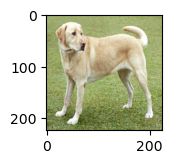

In [46]:
plt.figure(figsize=(1.5,1.5))
plt.imshow(img)
plt.show()

(numpy.ndarray, (224, 224, 3))

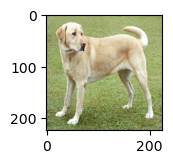

In [47]:
# 방법 3
img_data1 = plt.imread('data/sample.jpg')
img_data1 = cv2.resize(img_data1, dsize=(224,224),
                      interpolation=cv2.INTER_NEAREST) # 사이즈 조정
plt.figure(figsize=(1.5,1.5))
plt.imshow(img_data1)
type(img_data1), img_data1.shape

In [48]:
img_data.shape, img_data1.shape

((224, 224, 3), (224, 224, 3))

In [49]:
# 차원 변경 (224,224,3) => (1, 224, 224, 3) 하는 방법들
# 784 => (1, 784)
import numpy as np
a = np.array([1,2,3])
# a의 shape(3,) = (1,3) ; newaxis를 이용한 축 추가, reshape을 이용한 shape 변경
print('a 배열의 축 추가(3행 1열): \n', a[:, np.newaxis])
print('a 배열의 축 추가(1행 3열) :', a[np.newaxis, :]) # a[np.newaxis] a의 축을 추가하기위해 newaxis 앞에 추가하면 행 뒤에 추가하면 열 
print('a 배열의 축 추가(1행 3열) :', a[np.newaxis, ...]) 
print('a 배열의 reshape :', a.reshape(-1, 3)) 

a 배열의 축 추가(3행 1열): 
 [[1]
 [2]
 [3]]
a 배열의 축 추가(1행 3열) : [[1 2 3]]
a 배열의 축 추가(1행 3열) : [[1 2 3]]
a 배열의 reshape : [[1 2 3]]


In [50]:
# 예측하기
pred = model.predict(img_data[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 3s 3s/step


208

In [51]:
# 예측하기
pred = model.predict(img_data1[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 0s 146ms/step


208

In [59]:
from tensorflow.keras.applications.vgg19 import decode_predictions
result = decode_predictions(pred, top=5)[0]
for row in result:
    print('{}일 확율: {}%'.format(row[1], round(row[2]*100,2)))

Labrador_retriever일 확율: 75.25%
Weimaraner일 확율: 13.01%
kuvasz일 확율: 2.97%
Great_Dane일 확율: 2.02%
bloodhound일 확율: 1.5%


# 4. 인셉션 모듈
- 교안 55pt
    - 1x1 컨볼류션을 하는 이유 : 채널 수를 줄여 연산속도를 높이려고

In [2]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate

In [3]:
model_input = Input(shape=(28,28,3))
pre = Dense(192)(model_input) # => 28*28*192 
conv1 = Conv2D(64, # 커널(필터) 갯수
               1, # 커널 사이즈
               padding='same')(pre)
conv2 = Conv2D(128, 3, padding='same')(pre)
conv3 = Conv2D(32, 5, padding='same')(pre)
pool = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(pre)
model_out = concatenate([conv1,conv2,conv3, pool])
model = Model(inputs = model_input, outputs=model_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 28, 28, 192)  768         ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 64)   12352       ['dense[0][0]']                  
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 128)  221312      ['dense[0][0]']                  
                                                                                              

- GoogLeNet 중 Inception 모듈, Bottle Neck 구조
- GoogLeNet에서 소개된 핵심 요소로, 이미지 분류와 같은 작업에서 효율적이고 강력한 성능을 제공
```
![image](image/인셉션모듈.png)
```
<img src='image/인셉션모듈.png' alt='image' width='400'>

In [1]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate

In [6]:
model_input = Input(shape=(28,28,3))

pre = Dense(192)(model_input)
conv1 = Conv2D(64, 1, padding='same')(pre)

conv2_1 = Conv2D(96, 1, padding='same')(pre)
conv2 = Conv2D(128, 3, padding='same')(conv2_1)

conv3_1 = Conv2D(16, 1, padding='same')(pre)
conv3 = Conv2D(32, 5, padding='same')(conv3_1)

pool = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(pre)
conv4 = Conv2D(32, 1, padding='same')(pool)

model_out = concatenate([conv1, conv2, conv3, conv4])

model = Model(inputs=model_input, outputs=model_out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 28, 28, 192)  768         ['input_5[0][0]']                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 28, 28, 96)   18528       ['dense_4[0][0]']                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 28, 28, 16)   3088        ['dense_4[0][0]']                
                                                                                            

# 5. Residual block
<img src="image/residual_block.png" alt="Residual block" width="300" style="float:left;">

In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, add
model_input = Input(shape=(28,28,3))

x = Conv2D(64, 3, padding='same', activation='relu')(model_input)
# residual block
conv = Conv2D(32, 3, padding='same', activation='relu')(x)
conv = Conv2D(64, 3, padding='same', activation='relu')(conv)

y = add([conv, x])
y = Activation('relu')(y)

model_output = Conv2D(64, 3, activation='relu')(y)

model = Model(inputs = model_input, outputs=model_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 28, 28, 64)   1792        ['input_8[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 32)   18464       ['conv2d_18[0][0]']              
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_19[0][0]']              
                                                                                              

# 6. 케라스 모델 가져오기

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50()
# weights=None : 랜덤값으로 초기화된 상태의 가중치
# weights='imagenet'(기본값) : imagenet 데이터로 학습이 끝난 가중치 (224,224,3 이미지-> 1000 분류)
# model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
json_str = model.to_json()
# json_str
with open('model/model.json', 'w') as json_file:
    json_file.write(json_str)

In [13]:
from tensorflow.keras.models import model_from_json
with open('model/model.json', 'r') as f:
    json_str2 = f.read()
model2 = model_from_json(json_str2)
# model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [33]:
# 이미지를 예측하기 위해 이미지 파일을 넘파이 배열로 가져오는 방법 4가지
# 방법1
import cv2 # 사진 사이즈 조절
img_cv = cv2.imread('data/sample.jpg', cv2.IMREAD_COLOR) # 넘파이 배열
img_cv2 = cv2.resize(img_cv, dsize=(224,224), interpolation=cv2.INTER_NEAREST)
img_data = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
print('방법1(모두 넘파이) :', img_data.shape, img_cv2.shape, img_cv.shape)

# 방법2 
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size=(224,224)) # Image 타입
img_data = image.img_to_array(img) # 넘파이로 변경
print('방법2(Image타입으로 읽어 넘파이로 변환) : ', img_data.shape, type(img))

# 방법3
from matplotlib import pyplot as plt
import cv2
img_plt = plt.imread('data/sample.jpg') # 넘파이배열
img_data = cv2.resize(img_plt, dsize=(224,224), interpolation=cv2. INTER_NEAREST)
print('방법3(모두넘파이) :', img_data.shape, img_plt.shape)

# 방법4
from PIL import Image # pip sinstall pillow
import numpy as np
import cv2
imageFile = Image.open('data/sample.jpg') # 이미지 파일
img_numpy = np.array(imageFile) # 넘파이로 변경
img_data = cv2.resize(img_numpy, dsize=(224,224), interpolation=cv2.INTER_NEAREST)
print('방법4 :', img_data.shape)

방법1(모두 넘파이) : (224, 224, 3) (224, 224, 3) (577, 700, 3)
방법2(Image타입으로 읽어 넘파이로 변환) :  (224, 224, 3) <class 'PIL.Image.Image'>
방법3(모두넘파이) : (224, 224, 3) (577, 700, 3)
방법4 : (224, 224, 3)


In [41]:
# 모델 사용하기
# 모델 예측시 매개변수로 들어갈 데이터의 축 추가
# 방법1
x = np.expand_dims(img_data, axis=0)
print('방법1 : ', x.shape)
# 방법2
x = img_data[np.newaxis, ...]
print('방법2 : ', x.shape)
# 방법3
x = img_data[np.newaxis, :]
print('방법3 : ', x.shape)
# 방법4
x = img_data.reshape(-1, 224,224,3)
print('방법4 : ', x.shape)

방법1 :  (1, 224, 224, 3)
방법2 :  (1, 224, 224, 3)
방법3 :  (1, 224, 224, 3)
방법4 :  (1, 224, 224, 3)


In [42]:
pred = model.predict(x)
pred.argmax()

1/1 [==============================] - 5s 5s/step


208

In [43]:
decode_predictions(pred, top=3)

[[('n02099712', 'Labrador_retriever', 0.11523034),
  ('n02108089', 'boxer', 0.11239101),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.10665777)]]

# 7. 전이학습

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
resnet_model = ResNet50(input_shape=(200,200,3),
                       include_top=False) # 모델의 최상위 계층은 포함하지 않고 가져옴. 전이학습시 사용
resnet_model.trainable = True # 가중치의 업데이트 허용
# resnet_model.trainablen = False : 기존의 ResNet50 가중치는 고정. 새로 추가된 가중치만 업데이트

model = Sequential()
model.add(resnet_model)
model.add(Flatten()) # 1차원
model.add(Dense(1021, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1021)              102460413 
                                                                 
 dense_1 (Dense)             (None, 3)                 3066      
                                                                 
Total params: 126,051,191
Trainable params: 125,998,071
Non-trainable params: 53,120
_________________________________________________________________
